In [1]:
import glob
import pickle 
import pandas as pd

In [10]:
import numpy as np
import random
from matplotlib import pyplot as plt

from matplotlib.ticker import FormatStrFormatter

In [2]:
files=glob.glob("./pickle/*.pkl")
len(files)

102

In [3]:
df= pd.read_excel("./bases/informacion_politicos_V2.xlsx")

In [4]:
df[df["screen_name"]=="AlvaroUribeVel"]["followers_count"]

96    5012943
Name: followers_count, dtype: int64

In [5]:
u=[]
for i in files:
    i=i.split("e\\")[1]
    i=i.split("_foll")[0]
    u.append(i)

In [6]:
u=set(u)
n=set(list(df["screen_name"]))

print(len(n-u))
n-u

0


set()

In [7]:
objects = []

for i in files: 
    
    pickle_file = open(i, "rb")

    
    while True:

        try:

            objects.append(pickle.load(pickle_file))

        except EOFError:

            break

    pickle_file.close()


In [8]:
numero_per_usuario={}

for i in objects: 
    
    llave=list(i.keys())[0]
    
    usuarios=i[llave]
    
    for usuario in usuarios:
        if usuario in numero_per_usuario.keys():
            
            numero_per_usuario[usuario]+=1
        else:
            numero_per_usuario[usuario]=1
            
    

In [9]:
data=[]
for i in list(numero_per_usuario.keys()):
    data.append(numero_per_usuario[i])

In [11]:
len(data)

7152304

In [12]:
x=0

for i in data: 
    if i>x:
        x=i
        
print("usuario que sigue más políticos: ", x)

usuario que sigue más políticos:  98


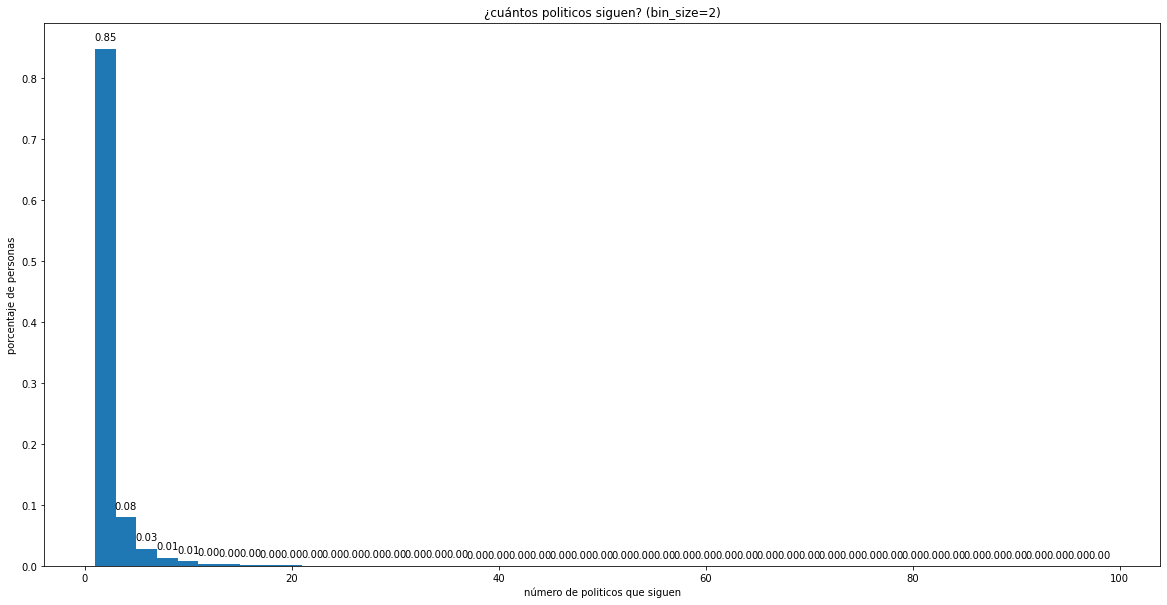

In [13]:
bins = range(min(data), max(data) + 2, 2) # fixed bin size
weights=np.ones(len(data)) / len(data)


fig, ax = plt.subplots(figsize=(20,10),facecolor='white',edgecolor='blue')

ax.hist(data, bins=bins,weights=weights)


from matplotlib import pyplot as plt
import numpy as np
  
ax.set_title("¿cuántos politicos siguen? (bin_size=2)")
  
# adding labels
ax.set_xlabel('número de politicos que siguen')
ax.set_ylabel('porcentaje de personas')



rects = ax.patches
labels = [ "{:.2f}".format(rect.get_height())  for rect in rects]
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
# Show plot
plt.show()

In [14]:
import statistics as stats

In [15]:
st=stats.stdev(data)
me=stats.mean(data)
print(me,st,me+st)

2.0415573778743186 3.4923516086733324 5.533908986547651


In [16]:
x=0
for i in data: 
    if i>=(st+me):
        x+=1
        
y=(x/len(data))
   
p="{:.5f}".format(y)
print(x, p)

389683 0.05448


In [44]:
261475*3200

836720000

In [20]:
x=0
lista_ids=[]
for i in list(numero_per_usuario.keys()):
    
    if numero_per_usuario[i]>st+me:
        lista_ids.append(i)
        
        

len(lista_ids)

389683

In [21]:
file = open("./pickle/mayores_mean.pkl","wb")

pickle.dump(lista_ids,file)

file.close()

In [22]:
lista_ids[768:788]

[304615687,
 277115894,
 1037387982452473861,
 1197689969457991680,
 1361470380066680835,
 145506002,
 89299740,
 220178177,
 2284484219,
 299725755,
 1375399834899914752,
 1370011544763924480,
 973632534725656576,
 185892161,
 1289945860315455488,
 116750771,
 363668032,
 1375128842424172546,
 1183874792,
 126480343]